# **LOAD AND EXPLORE DATA**


![texto alternativo](https://lh3.googleusercontent.com/proxy/YYjyppIqI_akVZ9i-dKWblPQO7ZYAY8msznt8u-seopNKVpCQ_16XvETnJp9XtRrMwNaafP1sm4DFgsI0iCCpYlgE0qV_cHBdnzr7eWnbir1qFEQxjhLO1Q9FNOg4v4YWhnF)

### **INITIAL WORKING ENVIRONMENT SET UP**

In [0]:
# Utils
import math

# Data manipulation
import numpy as np
import pandas as pd

### **READ DATA**


In [0]:
#data = pd.read_csv('Auto.csv')
data = pd.read_csv('https://raw.githubusercontent.com/AzIz000/machine-learning/master/datasets/Advertising.csv')
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### **EXPLORE METADATA**


**Analize data set:**

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [0]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### **EXPLORE DATA**

In [0]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Plot data:**

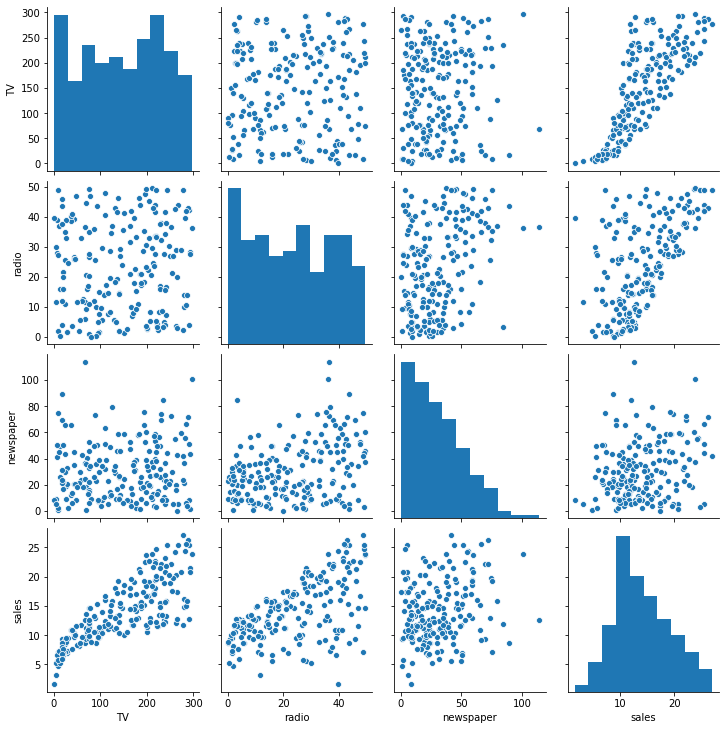

In [0]:
sns.pairplot(data)

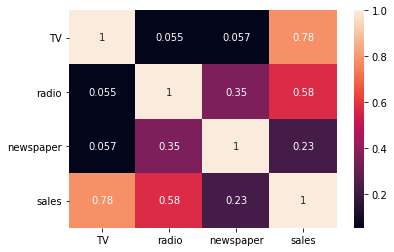

In [0]:
sns.heatmap(data.corr(),annot=True)

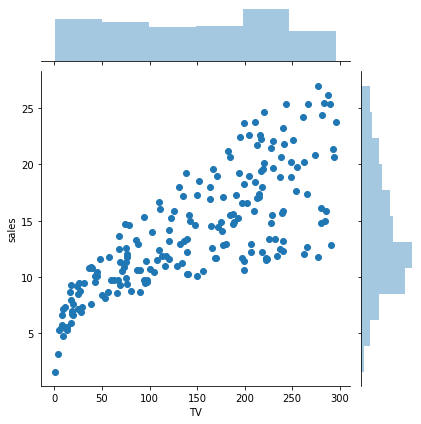

In [0]:
sns.jointplot(data=data,y='sales',x='TV')

# **MODEL DATA**

## **LINEAR REGRESSION**

### **ESTIMATING THE COEFFICIENTS**

**EXERCISE:** Draw a simple linear regression with sales as output and TV as input. Import any needed library

Calculated intercept: 
 [7.03259355]
Calculated coefficients: 
 [[0.04753664]]


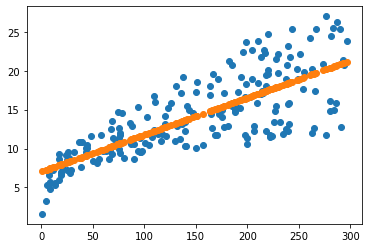

### **ASSESSING THE ACCURACY OF THE COEFFICIENT ESTIMATES**

**EXERCISE:** Manually calculate (not using library implementation) t-statistics for beta0 and beta1

In [0]:
# First, calculate RSS

# Second, calculate RSE:


# Third, calculate SE for beta0 and beta1



# Finally, calculate t statistic


RSS:  sales    2102.530583
dtype: float64
RSE:  3.2586563686504624
SE(B0):  0.4578429402734785
SE(B1):  0.0026906071877968707
T0:  [15.36027517]
T1:  [17.6676256]


**EXERCISE:** Compare your results with those provided by statsmodels.api

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 15 May 2020   Prob (F-statistic):           1.47e-42
Time:                        21:59:38   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

### **ASSESSING THE ACCURACY OF THE MODEL**

#### **RESIDUAL STANDARD ERROR (RSE)**

**EXERCISE:** Calculate RSE and plot the deviation

In [0]:
#Calculate RSE:


RSE:  3.2586563686504624


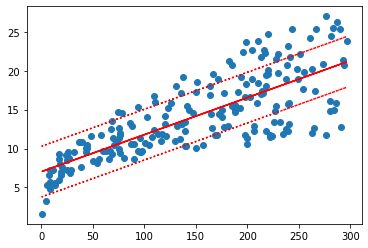

In [0]:
#Plot deviation


#### **R2**

**EXERCISE**: Calculate R2 score

In [0]:
# Using formula

# Using scikit learn


R2:  sales    0.611875
dtype: float64
R2:  0.611875050850071


#### **MSE**

**EXERCISE**: Calculate **MSE** score

In [0]:
# Using formula

# Using scikit learn


MSE:  sales    10.512653
dtype: float64
MSE:  10.512652915656757


## **MULTIPLE LINEAR REGRESSION**

### **ESTIMATING THE COEFFICIENTS**

#### **INDENDENT REGRESSIONS**

**First, try separate regressions:**

In [0]:
X1 = data[['TV']]
X2 = data[['radio']]
X3 = data[['newspaper']]

X1sm = sm.add_constant(X1)
X2sm = sm.add_constant(X2)
X3sm = sm.add_constant(X3)
model1 = sm.OLS(y, X1sm)
model2 = sm.OLS(y, X2sm)
model3 = sm.OLS(y, X3sm)
results1 = model1.fit()
results2 = model2.fit()
results3 = model3.fit()
print(results1.summary())
print(results2.summary())
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 15 May 2020   Prob (F-statistic):           1.47e-42
Time:                        22:15:29   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

**PROBLEMS:**

*   How do we put together all the results?
*   Each regression model ignores the other two



#### **MULTIPLE REGRESSION**

In [0]:
X = data[['TV','radio','newspaper']]
Xsm = sm.add_constant(X)
model = sm.OLS(y, Xsm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 15 May 2020   Prob (F-statistic):           1.58e-96
Time:                        22:19:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

**EXERCISE:** Why newspaper p-value now suggests no relation whereas it did in single regression?

*answer here*

### **REMOVING THE ADDITIVE ASSUMPTION**



*   Linear model states that the average effect on sales of one unit increase in TV is always beta1, regardless of the amount spent on radio.
*   This simple model may be incorrect. Radio advertising may increase effectiveness of TV advertising



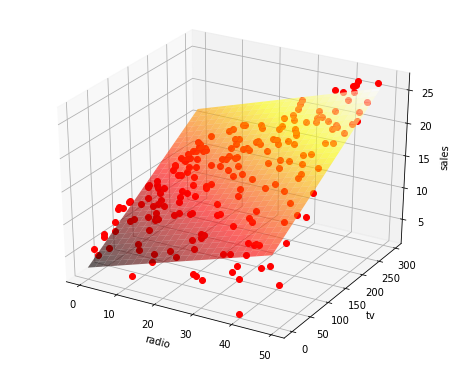

In [0]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
X = data[['radio','TV']]
multiple = LinearRegression()
multiple.fit(X,y)
# 3D Plotting
fig = plt.figure(figsize=[8, 6.5]) #bigger
ax = fig.gca(projection='3d')

radio_surf = np.arange(0, 50, 2)                # generate mesh
tv_surf = np.arange(0, 300, 5)
radio_surf, tv_surf = np.meshgrid(radio_surf, tv_surf)

sales_surf = multiple.intercept_ + multiple.coef_[0,0]*radio_surf + multiple.coef_[0,1]*tv_surf 

ax.plot_surface(radio_surf, tv_surf, sales_surf, cmap=cm.hot, alpha=0.6);
ax.set_xlabel('radio')
ax.set_ylabel('tv')
ax.set_zlabel('sales')
ax.plot(data['radio'],data['TV'],data['sales'],'ro')


Difficult to perceive here, but where both TV and radio are low, true sales are lower than predicted and, when both are high, true sales are higher than predicted.

**synergy or interaction effect**

**EXERCISE:** Fit a new model taking into account TV-radio relationship

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Fri, 15 May 2020   Prob (F-statistic):          6.68e-146
Time:                        22:52:58   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.0

**beta3 = increase of effectivenes of TV advertising for une unit increase in radio advertisin (or vice-versa)**

**hierarchical principle**